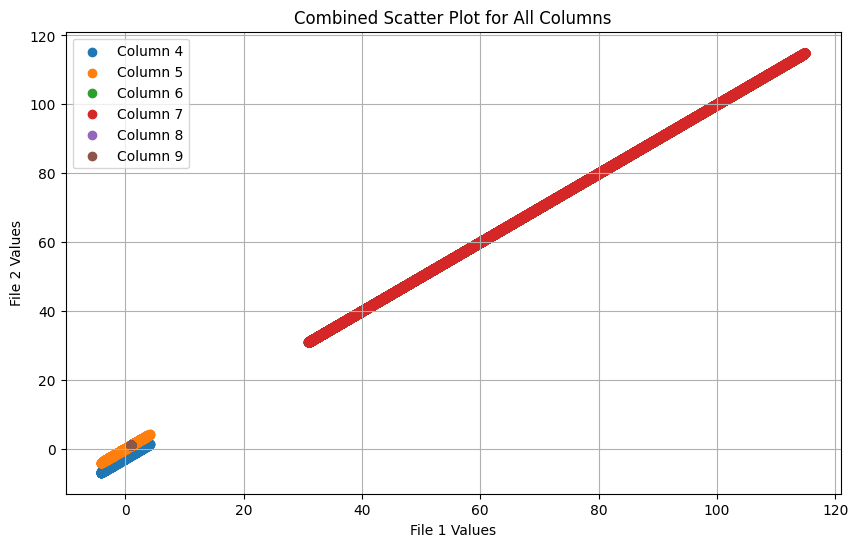

In [89]:
import matplotlib.pyplot as plt
import math
import numpy as np


# Define function to extract relevant lines from the files
def extract_p_lines(file_content):
    return [
        line.split() for line in file_content.splitlines()
        if line.startswith("P 3 -1 2212")
    ]

# Read file contents from actual files
# file1_path = 'hepmc_files/Pentaquark_hepmc_output_20241204_p275.0GeV_e18.0GeV_kinematicCut.hepmc'
# file2_path = 'hepmc_files/Pentaquark_hepmc_output_20241204_p275.0GeV_e18.0GeV_kinematicCut_ip6_hidiv_275x18.hepmc'

file1_path = 'hepmc_files/Pentaquark_hepmc_output_20241206_p275.0GeV_e18.0GeV_two_body_kinematics_eta1.9-8_100000evts.hepmc'
file2_path = 'hepmc_files/Pentaquark_hepmc_output_20241206_p275.0GeV_e18.0GeV_two_body_kinematics_eta1.9-8_100000evts__ip6_hidiv_275x18.hepmc'

with open(file1_path, 'r') as file1, open(file2_path, 'r') as file2:
    file_1_content = file1.read()
    file_2_content = file2.read()

# Extract relevant lines
file_1_lines = extract_p_lines(file_1_content)
file_2_lines = extract_p_lines(file_2_content)

# Convert strings to floats for comparison
file_1_values = [[float(x) for x in line[4:]] for line in file_1_lines]
file_2_values = [[float(x) for x in line[4:]] for line in file_2_lines]

# Initialize vectors for each column
num_columns = len(file_1_values[0])  # Determine the number of columns from one row
vectors_file1 = [[] for _ in range(num_columns)]
vectors_file2 = [[] for _ in range(num_columns)]

# Populate vectors
for i in range(num_columns):
    vectors_file1[i] = [row[i] for row in file_1_values]
    vectors_file2[i] = [row[i] for row in file_2_values]

# Assign vectors to individual variable names for clarity
px1 = vectors_file1[0]  # 5th column in the original file (index 2 after slicing)
px2 = vectors_file2[0]
py1 = vectors_file1[1]  # 6th column in the original file (index 3 after slicing)
py2 = vectors_file2[1]
pz1 = vectors_file1[2]
pz2 = vectors_file2[2]
# and so on for additional columns

# Combined scatter plot for each corresponding column pair
plt.figure(figsize=(10, 6))
for i in range(num_columns):
    x_values = vectors_file1[i]
    y_values = vectors_file2[i]
    plt.scatter(x_values, y_values, label=f'Column {i+4}')

plt.xlabel("File 1 Values")
plt.ylabel("File 2 Values")
plt.title("Combined Scatter Plot for All Columns")
plt.legend()
plt.grid(True)
plt.show()


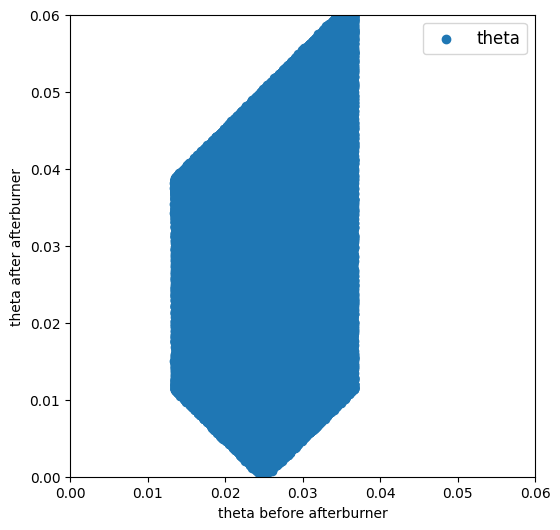

In [92]:
# num_rows = min(len(px_column5_file1), len(px_column5_file2), len(py_column6_file1), len(py_column6_file2))
# num_rows = len(px1)
# for i in range(num_rows):
# for i in range(10):
#     print(f"px1: {px1[i]} : px2: {px2[i]}    DIFF = {px2[i]-px1[i]}.")
#     print(f"py1: {py1[i]} : py2: {py2[i]}    DIFF = {py2[i]-  py1[i]} ")
#     print(f"pz1: {pz1[i]} : pz2: {pz2[i]}    DIFF = {pz2[i]-  pz1[i]} \n")

px1 = np.array(px1)  # Convert to numpy array
py1 = np.array(py1)
pz1 = np.array(pz1)
px2 = np.array(px2)  # Convert to numpy array
py2 = np.array(py2)
pz2 = np.array(pz2)


tanTheta1 = np.sqrt(px1**2 + py1**2)/pz1
tanTheta2 = np.sqrt(px2**2 + py2**2)/pz2

theta1 = np.atan(tanTheta1)
theta2 =  np.atan(tanTheta2)

plt.figure(figsize=(6, 6))
plt.scatter(theta1, theta2, label=f'theta')
plt.xlim(0, 0.06)
plt.ylim(0, 0.06)
plt.xlabel('theta before afterburner')
plt.ylabel('theta after afterburner')
plt.legend(fontsize=12)




/var/folders/zp/kq2822yd3qg7zh0t16vzck940000gn/T/ipykernel_68954/3845350320.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)


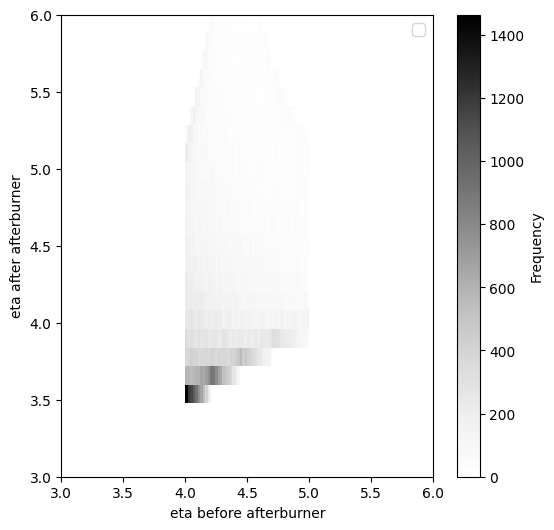

In [93]:

eta1 = -np.log( np.tan(theta1/2))
eta2 = -np.log( np.tan(theta2/2))

# plt.hexbin(eta1, eta2, gridsize=30, cmap='viridis', label=f'eta')
plt.figure(figsize=(6, 6))
# plt.scatter(eta1, eta2, label=f'eta')
plt.hist2d(eta1, eta2, bins=50, cmap='Grays')
plt.colorbar(label='Frequency')
plt.xlim(3, 6)
plt.ylim(3, 6)
plt.xlabel('eta before afterburner')
plt.ylabel('eta after afterburner')
plt.legend(fontsize=12)

